# Samruddhi Zemse ( Data Science And Business Analytics Intern )


# TASK 1: 3) Exploratory Data Analysis: Retail
   
   Problem Statement:
   
         Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
         As a business manager, try to find out the weak areas where you can
         work to make more profit.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# LOADING DATA
data=pd.read_csv(r'C:\Users\User\Desktop\SampleSuperstore.csv')

In [11]:
# TO SEE THETOP 5 ENTERIES
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [12]:
# CHECK MISSING VALUES
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [13]:
# THE DATASET HAS NO NULL VALUES

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [15]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# OBSERVATION:
 MIN SALES =0.444,MAX SALES=22638.48, MIN PROFIT=-6599.978,MAX PROFIT=8399.976

In [16]:
#CALCULATNG TOTAL SALES AND TOTAL PROFIT
print('Total Sales are {} and Total Profit is {} '.format(data['Sales'].sum(),data['Profit'].sum()))

Total Sales are 2297200.8603000003 and Total Profit is 286397.0217 


# COUNTRY

In [17]:
#CHECK THE DIFFERENT COUNTRIES
data['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

# OBSERVATION: 
There is only one country in the dataset therefore, there is no need of Country and Postal code so drop from dataset.

In [18]:
data=data.drop(['Country','Postal Code'],axis=1)

In [19]:
data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


<AxesSubplot:>

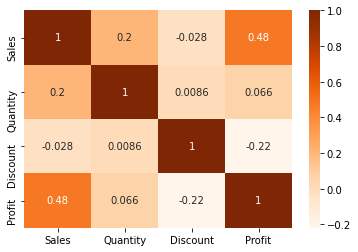

In [21]:
sns.heatmap(data.corr(),annot = True, cmap = 'Oranges')

In [22]:
# FROM THE ABOVE HEATMAP CORRELATION BETWEEN ALL FACTORS CAN BE SEEN

# CONSIDERING EACH FEATURE AND ANALYSING SEPERATELY FOR SOLUTION TO THE GIVEN PROBLEM 

# Customers

In [23]:
data['Segment'].unique().sum()

'ConsumerCorporateHome Office'

In [24]:
# THREE CATEGORIES FOR CUSTOMER i.e., CONSUMER,CORPORATE, HOME OFFICE

<ipython-input-25-f204afc42bf2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Segment')['Sales','Profit'].sum().plot.bar()


<AxesSubplot:xlabel='Segment'>

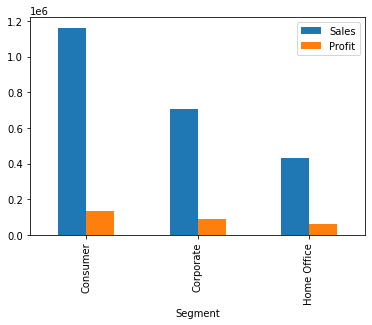

In [25]:
data.groupby('Segment')['Sales','Profit'].sum().plot.bar()

# OBSERVATION:
 1. Consumer has both maximum Sales and Profit.
 2. Sales and Profit are directly related.

<AxesSubplot:xlabel='Segment', ylabel='count'>

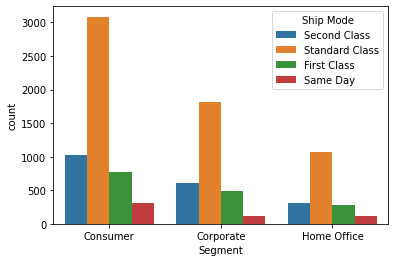

In [26]:
# RELATION BETWEEN SEGMENT AND SHIP MODE
sns.countplot(x='Segment',hue='Ship Mode',data=data)

# OBSERVATION:
Most transactions are done using Standard Class by all types of Segment class.

# Region

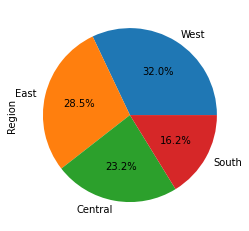

In [27]:
data['Region'].value_counts().plot.pie(autopct='%.1f%%')
plt.show()

# OBSERVATION:
 Maximum transactions are done by the West region ans Least by South.

<ipython-input-28-f06c5d4f2034>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Region')['Sales','Profit'].sum().plot.bar()


<AxesSubplot:xlabel='Region'>

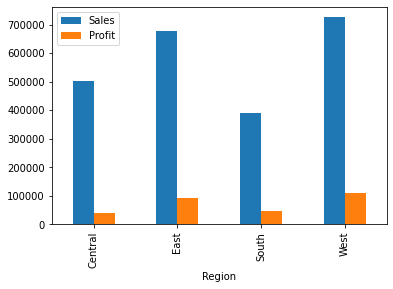

In [28]:
data.groupby('Region')['Sales','Profit'].sum().plot.bar()

# OBSERVATION:
  1. West has maximum Sales and Profit.
  2. South has Least Sales and Profit.

# Products

<ipython-input-29-72885d85efb2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Category')['Sales','Profit'].sum().plot.bar()


<AxesSubplot:xlabel='Category'>

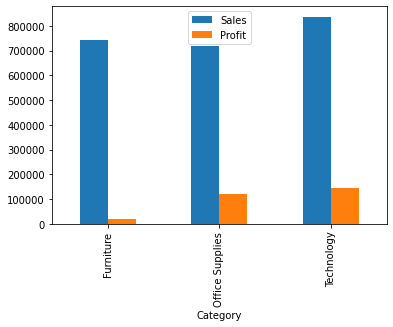

In [29]:
data.groupby('Category')['Sales','Profit'].sum().plot.bar()

# OBSERVATION:
1. Technology has highest Sales and Profit.
2. Furniture has least Sales and Profit.

<ipython-input-33-0eaf87bbc312>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data[data['Category']=='Furniture'].groupby('Sub-Category')['Sales','Profit'].sum().plot.bar()


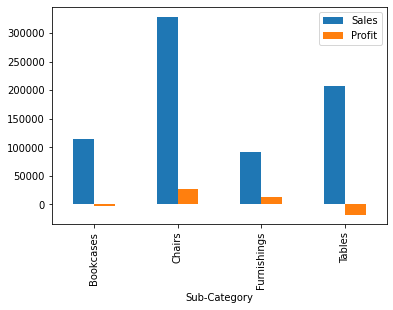

In [33]:
data[data['Category']=='Furniture'].groupby('Sub-Category')['Sales','Profit'].sum().plot.bar()
plt.show()

# OBSERVATION:
 1. Chairs are having maximum Sales and Profit
 2. Book cases  and Tables have Minimum Profit rather are running in loss

In [34]:
# ANALYZING WHY BOOK CASES AND TABLES ARE FACING LOSS BY COMPARING THEM WITH THE DISCOUNTS


<AxesSubplot:xlabel='Sub-Category'>

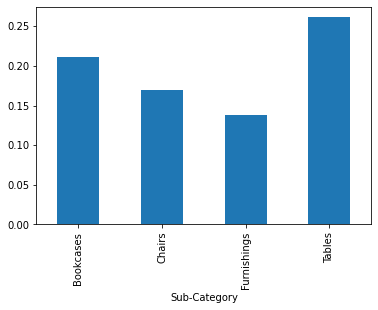

In [35]:
data[data['Category']=='Furniture'].groupby('Sub-Category')['Discount'].mean().plot.bar()

# OBSERVATION:
 Book Cases and Tables have maximum Discount more than 20%

<AxesSubplot:>

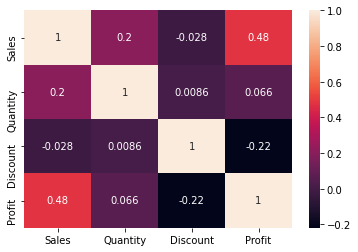

In [36]:
sns.heatmap(data.corr(),annot=True)

# OBSERVATION:
 The correlation between both Profit and Sales with Discount is Negative.

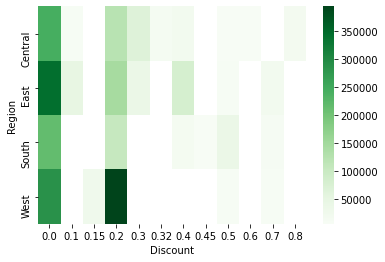

In [38]:
sales_coz_discount = pd.pivot_table(data = data, index = 'Region', columns = 'Discount', values ='Sales', aggfunc ='sum')
sns.heatmap(sales_coz_discount,cmap ='Greens')
plt.show()

# OBSERVATION:
  For a discount over 20% there is not much sale which has caused loss in the furniture category
  
 # Solution:
   ONE OF THE POSSIBLE SOLUTION IS TO REDUCE THE DISCOUNT % FROM 20% OF THE FURNITURE CATEGORY TO INCREASE PROFIT

# City And State

In [40]:
data['State'].value_counts().count()

49

In [41]:
data['City'].value_counts().count()

531

# OBSERVATION:
The company sells its products in 49 states and 531 cities.

# Top Products

Text(0, 0.5, 'Sales')

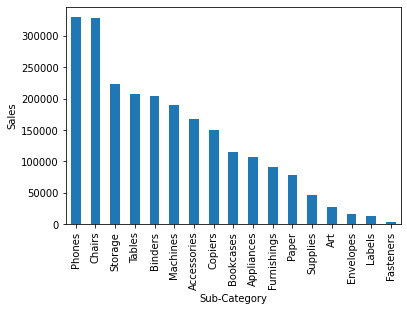

In [42]:
data.groupby('Sub-Category')['Sales'].sum().sort_values(ascending= False).plot.bar()
plt.ylabel('Sales')

# OBSERVATIONS:
Phones and Chairs have maximum sales

Text(0, 0.5, 'Profit')

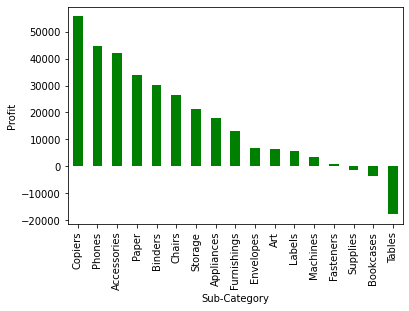

In [43]:
data.groupby('Sub-Category')['Profit'].sum().sort_values(ascending= False).plot.bar(color='g')
plt.ylabel('Profit')

# OBSERVATIONS:
Book Cases and Tables face the Maximum Loss.

Text(0, 0.5, 'Discount')

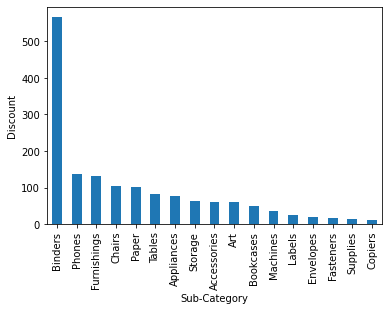

In [44]:
data.groupby('Sub-Category')['Discount'].sum().sort_values(ascending= False).plot.bar()
plt.ylabel('Discount')

# OBSERVATIONS:
Blinders have maximum Discount.

# Quantity
 OBSERVING TOP AND LEAST 5 PERFORMING PRODUCTS

In [47]:
print("TOP 5 PERFORMING PRODUCTS")
print(data.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending= False).tail())


TOP 5 PERFORMING PRODUCTS
Sub-Category
Envelopes    906
Bookcases    868
Supplies     647
Machines     440
Copiers      234
Name: Quantity, dtype: int64


In [46]:
print("LEAST 5 PERFORMING PRODUCTS")
print(data.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending= False).tail())


LEAST 5 PERFORMING PRODUCTS
Sub-Category
Envelopes    906
Bookcases    868
Supplies     647
Machines     440
Copiers      234
Name: Quantity, dtype: int64


# OBSERVATIONS
1. MIN SALES =0.444,MAX SALES=22638.48, MIN PROFIT=-6599.978,MAX PROFIT=8399.97
2. There is only one country in the dataset therefore, there is no need of Country and Postal code so drop from dataset.
3. Consumer has both maximum Sales and Profit.
4. Sales and Profit are directly related.
5. Most transactions are done using Standard Class by all types of Segment class
6. Maximum transactions are done by the West region ans Least by South.
7. West has maximum Sales and Profit.
8. South has Least Sales and Profit.
9. Technology has highest Sales and Profit.
10. Furniture has least Sales and Profit.
11. Chairs are having maximum Sales and Profit
12. Book cases and Tables have Minimum Profit rather are running in loss
13. Book Cases and Tables have maximum Discount more than 20%
14. The correlation between both Profit and Sales with Discount is Negative.
15. For a discount over 20% there is not much sale which has caused loss in the furniture category
16. The company sells its products in 49 states and 531 cities.
17. Phones and Chairs have maximum sales
18. Book Cases and Tables face the Maximum Loss.
19. Blinders have maximum Discount.




# SOLUTION
# ONE OF THE POSSIBLE SOLUTION IS TO REDUCE THE DISCOUNT % FROM 20% OF THE FURNITURE CATEGORY TO INCREASE PROFIT.